In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import plotly.express as px

In [12]:
df = pd.read_csv("../data/CompanyValues.csv")
df

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.4700
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.6300
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.0900
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.5000
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.3500
...,...,...,...,...,...,...,...
17523,TSLA,2019-12-21,405.59,14785210,410.29,413.00,400.1850
17524,TSLA,2019-12-22,405.59,14785210,410.29,413.00,400.1850
17525,TSLA,2019-12-25,425.25,8054720,418.36,425.47,412.6875
17526,TSLA,2019-12-28,430.38,9956827,435.00,435.31,426.1100


In [13]:
df["day_date"] = pd.to_datetime(df["day_date"])
df.dtypes

ticker_symbol            object
day_date         datetime64[ns]
close_value             float64
volume                    int64
open_value              float64
high_value              float64
low_value               float64
dtype: object

In [14]:
def get_ticker_data(ticker_df: pd.DataFrame, ticker: str) -> pd.DataFrame:
    return ticker_df[ticker_df.ticker_symbol == ticker]\
        .sort_values(by=["day_date"], ascending=True)\
        .drop(columns=["ticker_symbol"])\
        .reset_index(drop=True)

In [15]:
aapl = get_ticker_data(df, "AAPL")
aapl

,day_date,close_value,volume,open_value,high_value,low_value
0,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943
1,2010-06-02,37.7071,171594061,37.7914,37.8286,37.1907
2,2010-06-03,37.5886,162341809,37.8828,37.9357,37.2014
3,2010-06-04,36.5664,189045767,36.8871,37.4143,36.3757
4,2010-06-07,35.8486,221253336,36.8986,37.0214,35.7928
...,...,...,...,...,...,...
3080,2020-05-22,318.8900,20450750,315.7700,319.2300,315.3500
3081,2020-05-26,316.7300,31380450,323.5000,324.2400,316.5000
3082,2020-05-27,318.1100,28236270,316.1400,318.7100,313.0900
3083,2020-05-28,318.2500,33449100,316.7700,323.4400,315.6300


In [16]:
def plot_historical(plot_data: pd.DataFrame,title: str, x: str="day_date", y: str="close_value") -> None:
    plot_data.plot(
        kind="line",
        x=x,
        y=y,
        figsize=(15,5),
        title=f"{title} stocks",
        ylabel="Price"
    )
    plt.grid(linestyle="--")

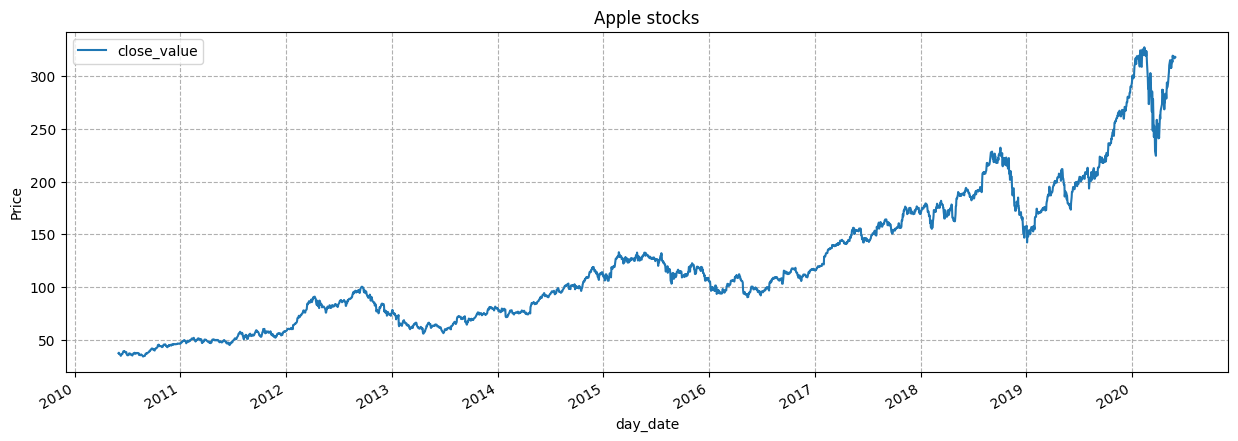

In [17]:
plot_historical(aapl, "Apple")

In [18]:
aapl["quarter_int"] = aapl.day_date.dt.quarter
aapl["quarter"] = aapl.day_date.dt.to_period("Q")
aapl

,day_date,close_value,volume,open_value,high_value,low_value,quarter_int,quarter
0,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943,2,2010Q2
1,2010-06-02,37.7071,171594061,37.7914,37.8286,37.1907,2,2010Q2
2,2010-06-03,37.5886,162341809,37.8828,37.9357,37.2014,2,2010Q2
3,2010-06-04,36.5664,189045767,36.8871,37.4143,36.3757,2,2010Q2
4,2010-06-07,35.8486,221253336,36.8986,37.0214,35.7928,2,2010Q2
...,...,...,...,...,...,...,...,...
3080,2020-05-22,318.8900,20450750,315.7700,319.2300,315.3500,2,2020Q2
3081,2020-05-26,316.7300,31380450,323.5000,324.2400,316.5000,2,2020Q2
3082,2020-05-27,318.1100,28236270,316.1400,318.7100,313.0900,2,2020Q2
3083,2020-05-28,318.2500,33449100,316.7700,323.4400,315.6300,2,2020Q2


In [10]:
aaplQ1 = aapl[aapl.quarter_int==1]
aaplQ1

,day_date,close_value,volume,open_value,high_value,low_value,quarter_int,quarter
150,2011-01-03,47.0814,110964733,46.5200,47.1800,46.4052,1,2011Q1
151,2011-01-04,47.3271,77212123,47.4914,47.5000,46.8786,1,2011Q1
152,2011-01-05,47.7143,63310259,47.0786,47.7628,47.0714,1,2011Q1
153,2011-01-06,47.6757,74957912,47.8170,47.8928,47.5571,1,2011Q1
154,2011-01-07,48.0171,77371653,47.7128,48.0500,47.4143,1,2011Q1
...,...,...,...,...,...,...,...,...
3039,2020-03-25,245.5200,75900510,250.7500,258.2500,244.3000,1,2020Q1
3040,2020-03-26,258.4400,63140170,246.5200,258.6800,246.3600,1,2020Q1
3041,2020-03-27,247.7400,51054150,252.7500,255.8700,247.0500,1,2020Q1
3042,2020-03-30,254.8100,41994110,250.7400,255.5200,249.4000,1,2020Q1


In [19]:
aaplQ1.quarter.unique()

<PeriodArray>
['2011Q1', '2012Q1', '2013Q1', '2014Q1', '2015Q1', '2016Q1', '2017Q1',
 '2018Q1', '2019Q1', '2020Q1']
Length: 10, dtype: period[Q-DEC]

In [72]:
aaplQ1 = aaplQ1\
    .reset_index()

([<matplotlib.axis.XTick at 0x177ed0ca0>,
 [Text(0, 0, '2011Q1'),
  Text(100, 0, '2012Q1'),
  Text(200, 0, '2013Q1'),
  Text(300, 0, '2014Q1'),
  Text(400, 0, '2015Q1'),
  Text(500, 0, '2016Q1'),
  Text(600, 0, '2017Q1'),
  Text(700, 0, '2018Q1')])

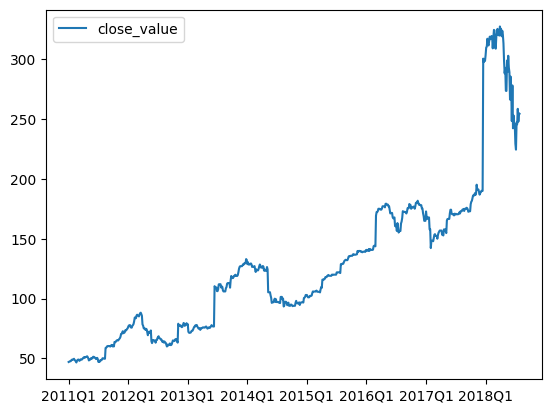

In [69]:
aaplQ1.reset_index().plot(
    kind="line",
    use_index=True,
    y="close_value"
)
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700], ["2011Q1", "2012Q1", "2013Q1", "2014Q1", "2015Q1", "2016Q1", "2017Q1", "2018Q1"])

In [14]:
px.line(df, x="day_date", y="close_value", color="ticker_symbol")

In [22]:
df["quarter"] = df["day_date"].dt.to_period("Q")
df["quarter_int"] = df["day_date"].dt.quarter
df

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,quarter,quarter_int
5601,AMZN,2010-06-01,123.2400,3650661,124.9700,126.5720,123.0200,2010Q2,2
2516,AAPL,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943,2010Q2,2
8686,GOOGL,2010-06-01,243.6667,2664303,242.6868,248.0565,242.5302,2010Q2,2
13894,MSFT,2010-06-01,25.8900,76120800,25.5300,26.3100,25.5200,2010Q2,2
8685,GOOGL,2010-06-02,249.2233,2513109,245.8439,249.4759,243.2071,2010Q2,2
...,...,...,...,...,...,...,...,...,...
14463,TSLA,2020-05-29,835.0000,11812490,808.7500,835.0000,804.2100,2020Q2,2
9255,GOOG,2020-05-29,1428.9200,1838059,1416.9400,1432.5700,1413.3500,2020Q2,2
11378,MSFT,2020-05-29,183.2500,42146720,182.7300,184.2700,180.4100,2020Q2,2
3085,AMZN,2020-05-29,2442.3700,3529329,2415.9400,2442.3700,2398.1973,2020Q2,2


In [20]:
df.dtypes

ticker_symbol            object
day_date         datetime64[ns]
close_value             float64
volume                    int64
open_value              float64
high_value              float64
low_value               float64
quarter                   int64
dtype: object

In [26]:
df[df.quarter_int == 1]

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,quarter,quarter_int
13744,MSFT,2011-01-03,27.9800,53386530,28.0500,28.1800,27.9200,2011Q1,1
16829,TSLA,2011-01-03,26.6200,1282904,26.8400,26.9999,25.9000,2011Q1,1
5451,AMZN,2011-01-03,184.2200,5324837,181.3700,186.0000,181.2100,2011Q1,1
8536,GOOGL,2011-01-03,305.2843,2359770,301.3088,305.9107,301.3088,2011Q1,1
2366,AAPL,2011-01-03,47.0814,110964733,46.5200,47.1800,46.4052,2011Q1,1
...,...,...,...,...,...,...,...,...,...
3126,AMZN,2020-03-31,1949.7200,5123626,1964.3500,1993.0200,1944.0100,2020Q1,1
41,AAPL,2020-03-31,254.2900,49250500,255.6000,262.4900,252.0000,2020Q1,1
14504,TSLA,2020-03-31,524.0000,17771490,501.2500,542.9600,497.0000,2020Q1,1
6211,GOOGL,2020-03-31,1161.9500,3263971,1148.7300,1173.4000,1136.7200,2020Q1,1


In [23]:
px.line(df[df.quarter_int == 1], x="quarter", y="close_value", color="ticker_symbol")

TypeError: Object of type Period is not JSON serializable

TypeError: Object of type Period is not JSON serializable

TypeError: Object of type Period is not JSON serializable

Figure({
    'data': [{'hovertemplate': 'ticker_symbol=MSFT<br>quarter=%{x}<br>close_value=%{y}<extra></extra>',
              'legendgroup': 'MSFT',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'MSFT',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([Period('2011Q1', 'Q-DEC'), Period('2011Q1', 'Q-DEC'),
                          Period('2011Q1', 'Q-DEC'), ..., Period('2020Q1', 'Q-DEC'),
                          Period('2020Q1', 'Q-DEC'), Period('2020Q1', 'Q-DEC')], dtype=object),
              'xaxis': 'x',
              'y': array([ 27.98  ,  28.0875,  28.    , ..., 149.7   , 160.23  , 157.71  ]),
              'yaxis': 'y'},
             {'hovertemplate': 'ticker_symbol=TSLA<br>quarter=%{x}<br>close_value=%{y}<extra></extra>',
              'legendgroup': 'TSLA',
              'line': {'color': '#EF553B', 'dash': 'solid'},
